In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

##### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.



In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


Observation: data frame has as columns: Country or Area, Year,Value, and Value Footnotes (last column has a lot of NaN values)

##### 5) How many rows and columns are in `gdp_df`? What are the data types of each column?


In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


Answer # 5: 7662 rows and 4 columns. 
Data types: Country or Area=object; Year=int64; Value=float64; Value Footnotes=float64

#####  6) Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [7]:
gdp_df= gdp_df.drop(columns = ['Value Footnotes'])


In [8]:
gdp_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266


In [9]:
gdp_df=gdp_df.rename(columns={'Country or Area':'country','Year':'year','Value':'gdp_per_capita'})
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002


##### 7) How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [10]:
gdp_df["year"].nunique()

33

In [11]:
year_value_count= gdp_df["country"].value_counts().reset_index()
year_value_count.head()
# from doing this, found some rows to drop but probably would need to look in depth. What can be done for this?

,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33


In [12]:
complete_data_years=year_value_count[year_value_count["count"] == 33]
complete_data_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  202 non-null    object
 1   count    202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [13]:
complete_data_years.head()

,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33


In [14]:
incomplete_data_years=year_value_count[year_value_count["count"] != 33]
incomplete_data_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 202 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  40 non-null     object
 1   count    40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [15]:
incomplete_data_years

,country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


In [16]:
gdp_df["year"].value_counts().sort_values()

year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2005    236
2004    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2019    242
2018    242
2017    242
2020    242
2015    242
2014    242
2016    242
2013    242
Name: count, dtype: int64

In [17]:
gdp_df[gdp_df["country"]=="Somalia"]

,country,year,gdp_per_capita
6271,Somalia,2022,1155.275773
6272,Somalia,2021,1136.735989
6273,Somalia,2020,1127.418534
6274,Somalia,2019,1138.285937
6275,Somalia,2018,1098.492832
6276,Somalia,2017,1059.143932
6277,Somalia,2016,1076.198333
6278,Somalia,2015,1029.699218
6279,Somalia,2014,925.577067
6280,Somalia,2013,889.166677


In [18]:
gdp_df[gdp_df["country"]=="Djibouti"]

,country,year,gdp_per_capita
1694,Djibouti,2022,4991.016244
1695,Djibouti,2021,4912.671543
1696,Djibouti,2020,4753.887886
1697,Djibouti,2019,4768.113005
1698,Djibouti,2018,4589.378326
1699,Djibouti,2017,4451.683846
1700,Djibouti,2016,4291.297376
1701,Djibouti,2015,4073.622455
1702,Djibouti,2014,3854.269956
1703,Djibouti,2013,3664.268036


Answer # 7: 202 countries have complete data for all years and 40 countries have incomplete data for all years. Somalia and Djibouti started to have data recorded from 2013 upwards(both countries are neighbors; Somalia seemed to have had a change in governance around 2012/2013, which might have had something to do with data being collected) 

From this question, how to look for the countries that were in the incomplete list on the main data frame? so as to graph them to look for year observtion

#### 8) In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [19]:
year_2020=gdp_df.loc[gdp_df['year']==2020]
year_2020.head()

,country,year,gdp_per_capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


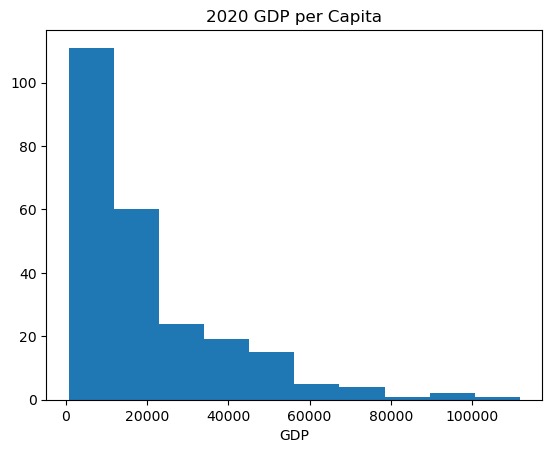

In [81]:
#histogram for 2020 looking at gdp per capita per country 
plt.hist(year_2020.gdp_per_capita)
plt.xlabel("GDP")
plt.title("2020 GDP per Capita")
plt.show()

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_33354/726190049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(year_2020['gdp_per_capita'], shade=True)


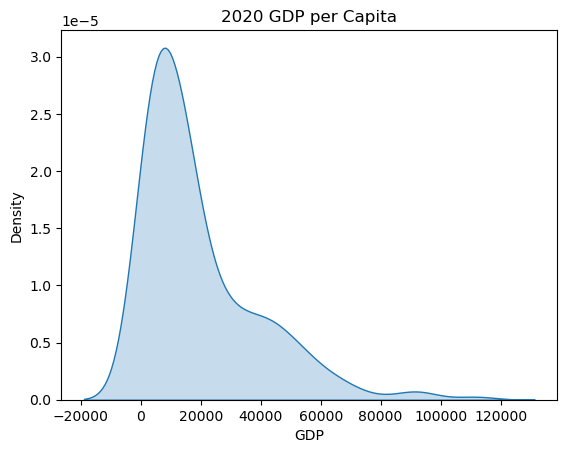

In [82]:
# density plot for 2020 looking at gdp per capita per country 

sns.kdeplot(year_2020['gdp_per_capita'], shade=True)
plt.xlabel("GDP")
plt.title("2020 GDP per Capita")
plt.show()

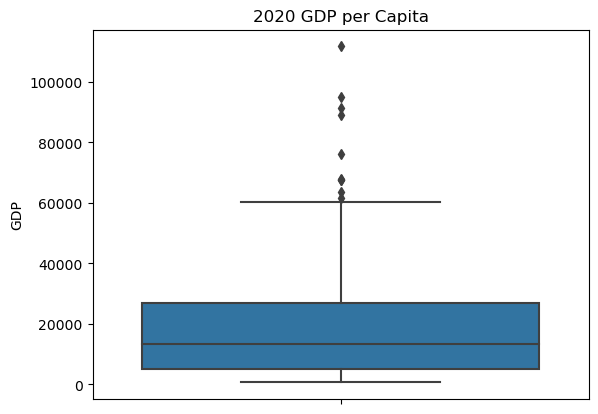

In [84]:
#boxplot for 2020 looking at gdp per capita per country
sns.boxplot(y=year_2020["gdp_per_capita"])
plt.ylabel("GDP")
plt.title("2020 GDP per Capita")
plt.show()

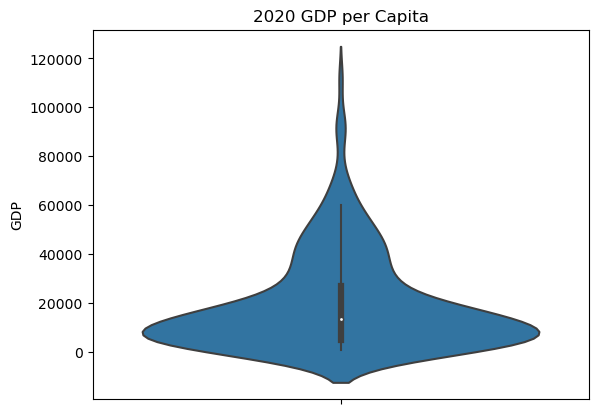

In [85]:
# violin plot for 2020 looking at gdp per capita per country
sns.violinplot(y=year_2020["gdp_per_capita"])
plt.ylabel("GDP")
plt.title("2020 GDP per Capita")
plt.show()

Observation:


#### 9. What was the median GDP per capita value in 2020?

In [24]:
year_2020["gdp_per_capita"].median()

13357.997573370474

Answer # 9: 13357.997573370474

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn

In [25]:
gdp_decades=gdp_df[gdp_df['year'].isin([1990, 2000,2010,2020])]
gdp_decades.head()

,country,year,gdp_per_capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


In [26]:
gdp_decades=gdp_decades.sort_values("year")


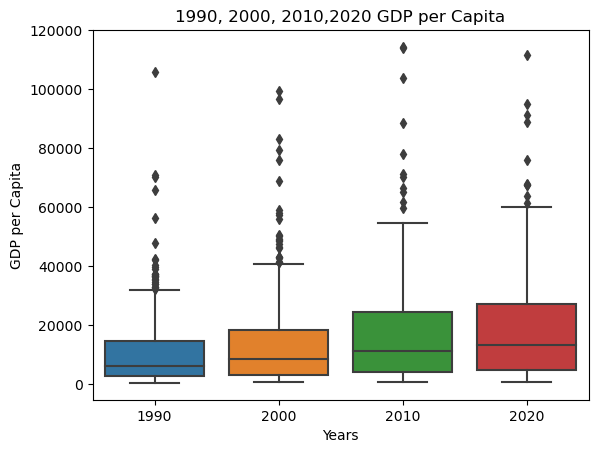

In [89]:
#box plot comparing gdp data for years 1900, 2000, 2010, 2020
sns.boxplot( x=gdp_decades["year"], y=gdp_decades["gdp_per_capita"] )
plt.xlabel("Years")
plt.ylabel("GDP per Capita")
plt.title("1990, 2000, 2010,2020 GDP per Capita")
plt.show()

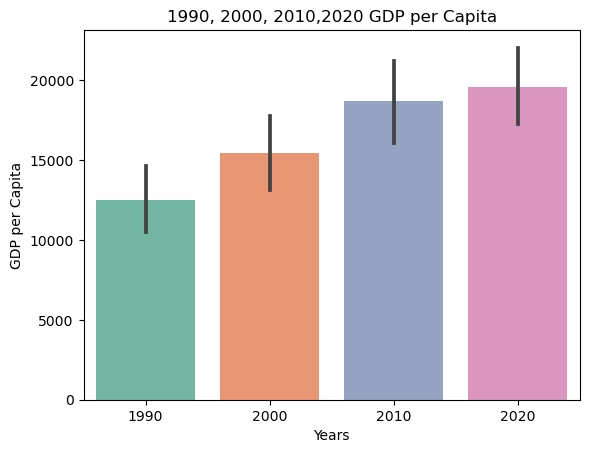

In [92]:
#bar plot comparing gdp data for years 1900, 2000, 2010, 2020
sns.barplot(x = "year", 
            y = "gdp_per_capita", 
            data = gdp_decades, 
            palette = 'Set2')
plt.xlabel('Year', fontsize=10)                                              
plt.ylabel('GDP per Capita', fontsize=10)
plt.xlabel("Years")
plt.ylabel("GDP per Capita")
plt.title("1990, 2000, 2010,2020 GDP per Capita")
plt.show()

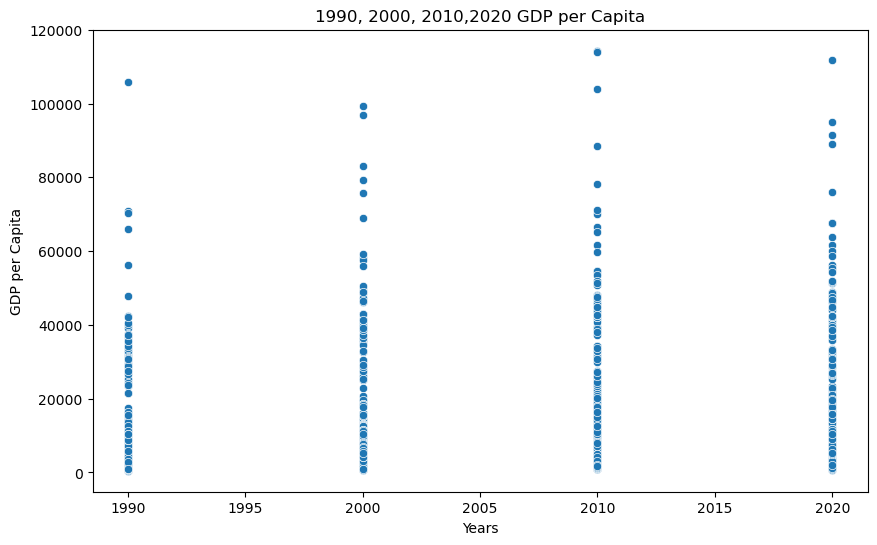

In [93]:
#scatter plot comparing gdp data for years 1900, 2000, 2010, 2020
plt.figure(figsize = (10,6))

sns.scatterplot(data = gdp_decades,
               x ="year",
               y = "gdp_per_capita" )
plt.xlabel("Years")
plt.ylabel("GDP per Capita")
plt.title("1990, 2000, 2010,2020 GDP per Capita")
plt.show()

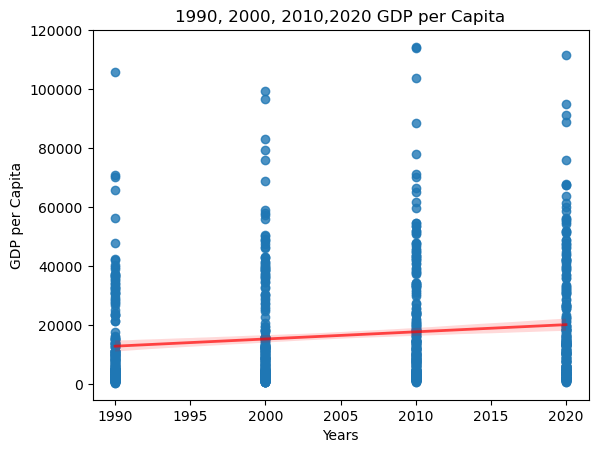

In [94]:
#scatter plot with trend line comparing gdp data for years 1900, 2000, 2010, 2020
sns.regplot(x=gdp_decades["year"], y=gdp_decades["gdp_per_capita"], line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel("Years")
plt.ylabel("GDP per Capita")
plt.title("1990, 2000, 2010,2020 GDP per Capita")
plt.show()

#### Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

Answer: From most of the graphs GDP has slightly gone up. Box plot probably has the best look at this comparison between years because you can see the distribution better, such as median and outliers. Median does seem to increase slightly by the years.

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [32]:
gdp_df_sorted_year=gdp_df.sort_values(["year","gdp_per_capita"], ascending=[True, False])
gdp_df_sorted_year

,country,year,gdp_per_capita
7302,United Arab Emirates,1990,105893.626059
4178,Luxembourg,1990,70860.819124
904,Brunei,1990,70358.724094
711,Bermuda,1990,65961.406278
6775,Switzerland,1990,56232.026080
...,...,...,...
4822,Mozambique,2022,1243.073638
6271,Somalia,2022,1155.275773
1628,Dem. Rep. Congo,2022,1132.654233
1215,Central African Republic,2022,819.192343


In [33]:
gdp_df_sorted_year[gdp_df_sorted_year.gdp_per_capita > 100000].head()

,country,year,gdp_per_capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


Answer to 11: United Arab Emirates in 1990 with $105893.626059

#### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [34]:
year_2020.sort_values("gdp_per_capita", ascending= False).head()
#Luxembourg had the highest gdp in 2020

,country,year,gdp_per_capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744


In [35]:
luxembourg_time_span=gdp_df[gdp_df["country"]=="Luxembourg"]
luxembourg_time_span.head(2)

,country,year,gdp_per_capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708


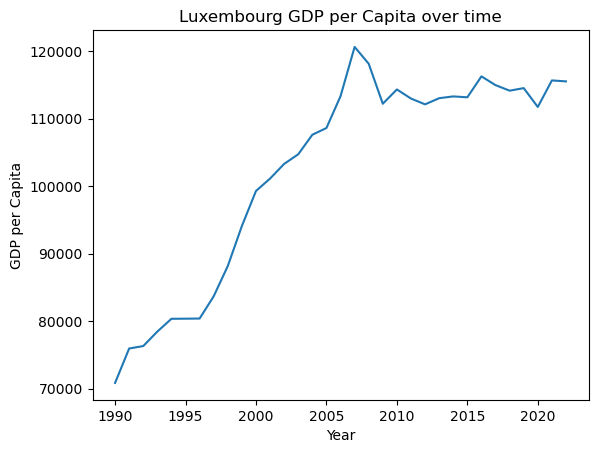

In [95]:
plt.plot(luxembourg_time_span["year"], luxembourg_time_span["gdp_per_capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title("Luxembourg GDP per Capita over time")
plt.show()

#### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [37]:
year_2020.sort_values("gdp_per_capita").head()

,country,year,gdp_per_capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556


In [38]:
burundi_time_span=gdp_df[gdp_df["country"]=="Burundi"]
burundi_time_span.head(2)

,country,year,gdp_per_capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712


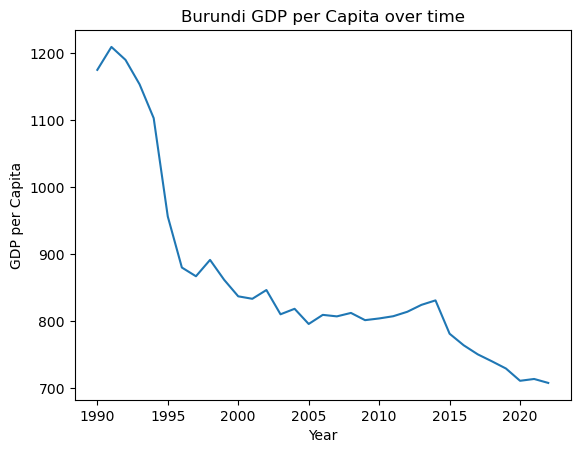

In [97]:
plt.plot(burundi_time_span["year"], burundi_time_span["gdp_per_capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title("Burundi GDP per Capita over time")
plt.show()

#### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [40]:

internet_df=pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', skipfooter=181)
# skip on bad lines was one of the only things to allow me to read data when pulling up bottom of list found a footer
#used xcode to look at the csv file, from there found that the footer was mutilined and needed to be cut off, used skipfooter

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_33354/3323299647.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df=pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', skipfooter=181)


In [41]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [42]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [43]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


#### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [44]:
internet_df=internet_df.drop( columns= ['Value Footnotes'])


In [45]:
internet_df=internet_df.rename(columns={"Country or Area": "country", "Year": "year", "Value":"internet_users_pct"})
internet_df.head()



,country,year,internet_users_pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [46]:
internet_df["year"].max()



2014

In [47]:
internet_df["year"].min()

1960

In [48]:
internet_df["year"].value_counts()

year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64

Before the year 1990 there were less than 10 observations per year, but after that year that count increases to bein the hundreds

#### 17. What is the first year to have a non-zero internet users percentage value?

In [49]:
internet_df=internet_df.sort_values(["year","internet_users_pct"], ascending=[True,False])
internet_df.head()

,country,year,internet_users_pct
533,Botswana,1960,0.0
665,Burundi,1960,0.0
1663,Grenada,1960,0.0
2558,Maldives,1960,0.0
3917,Syria,1960,0.0


In [50]:
internet_df[internet_df["internet_users_pct"]>0]
# how to order this to find the first? how would that be measured?, so far ordered year in ascedning and amount in descending, but that does not mean they were first  


,country,year,internet_users_pct
4301,United States,1990,0.784729
3040,Norway,1990,0.707299
3874,Switzerland,1990,0.595714
204,Australia,1990,0.585095
3849,Sweden,1990,0.584192
...,...,...,...
1720,Guinea,2014,1.720000
3648,Somalia,2014,1.630000
623,Burundi,2014,1.380000
4019,Timor-Leste,2014,1.140000


#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [51]:
int_2000_thru_2014=internet_df[(internet_df["year"]>=2000) & (internet_df["year"]<=2014)]
int_2000_thru_2014.head()

,country,year,internet_users_pct
3030,Norway,2000,52.000000
718,Canada,2000,51.300000
3436,San Marino,2000,48.799495
2943,New Zealand,2000,47.379557
3864,Switzerland,2000,47.100000


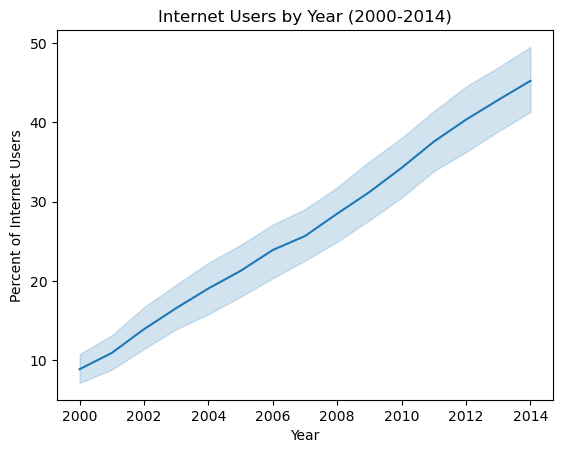

In [99]:
sns.lineplot(data=int_2000_thru_2014, x="year", y="internet_users_pct")
plt.xlabel("Year")
plt.ylabel("Percent of Internet Users")
plt.title("Internet Users by Year (2000-2014)")
plt.show()
#this doesn't seem like its right

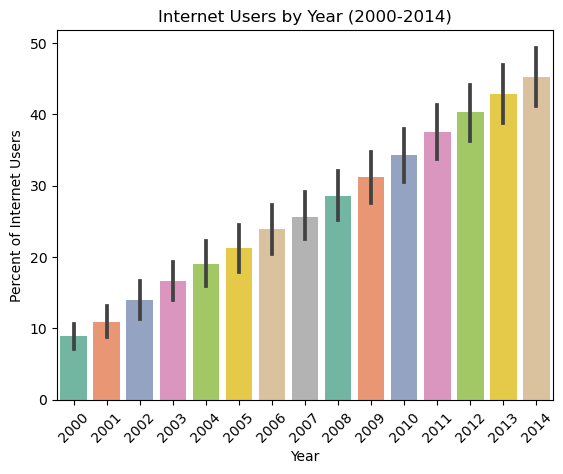

In [106]:
sns.barplot(x = "year", 
            y = "internet_users_pct", 
            data = int_2000_thru_2014, 
            palette = 'Set2')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('Year', fontsize=10)                                              
plt.ylabel('Percent of Internet Users', fontsize=10)
plt.title("Internet Users by Year (2000-2014)")
plt.show()
#used this to check the other graph

#### 19. For how many countries was the percentage of internet users below 5% in 2014?


In [55]:
internet_2014=internet_df.loc[internet_df["year"]==2014]
internet_2014.head()

,country,year,internet_users_pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90


In [56]:
internet_2014.loc[internet_2014["internet_users_pct"]<5].nunique()

country               16
year                   1
internet_users_pct    15
dtype: int64

In [57]:
internet_2014.loc[internet_2014["internet_users_pct"]<5]

,country,year,internet_users_pct
3956,Tanzania,2014,4.86
762,Central African Rep.,2014,4.03
2453,Madagascar,2014,3.70
1742,Guinea-Bissau,2014,3.32
909,Congo (Democratic Republic of the),2014,3.00
1299,Ethiopia,2014,2.90
782,Chad,2014,2.50
2814,Myanmar,2014,2.10
3533,Sierra Leone,2014,2.10
2975,Niger,2014,1.95


Answer: 16 countries

#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [58]:
gdp_and_internet_use= pd.merge(gdp_df,internet_df, on=["year","country"], how="outer")

In [59]:
gdp_and_internet_use=gdp_and_internet_use.sort_values(["country","year"], ascending=[False, False])
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 7629 to 7791
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8736 non-null   object 
 1   year                8736 non-null   int64  
 2   gdp_per_capita      7662 non-null   float64
 3   internet_users_pct  4495 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 341.2+ KB


#### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [74]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use["year"]==2014]

In [75]:
gdp_and_internet_use_2014.sort_values("internet_users_pct", ascending=False)
# top three are Iceland Bermuda Norway

,country,year,gdp_per_capita,internet_users_pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30
1669,Denmark,2014,52048.335493,95.99
8697,Andorra,2014,NaN,95.90
...,...,...,...,...
1045,Cabo Verde,2014,6703.812356,NaN
880,Brunei,2014,63131.186248,NaN
226,Arab World,2014,13872.227301,NaN
61,Africa Western and Central,2014,4146.994622,NaN


In [76]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 7629 to 7791
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8736 non-null   object 
 1   year                8736 non-null   int64  
 2   gdp_per_capita      7662 non-null   float64
 3   internet_users_pct  4495 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 341.2+ KB


In [77]:
gdp_and_internet_use_ibn=gdp_and_internet_use[gdp_and_internet_use["country"].isin(["Iceland","Bermuda","Norway"])]
gdp_and_internet_use_ibn.head()

,country,year,gdp_per_capita,internet_users_pct
5204,Norway,2022,67462.376446,NaN
5205,Norway,2021,65909.003030,NaN
5206,Norway,2020,63776.160965,NaN
5207,Norway,2019,64983.354208,NaN
5208,Norway,2018,64696.490887,NaN


/Users/amy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


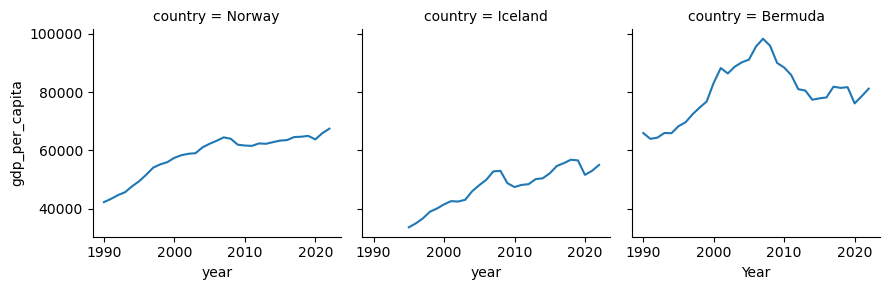

In [103]:
seafg_ibn=sns.FacetGrid(gdp_and_internet_use_ibn, col="country")
seafg_ibn.map_dataframe(sns.lineplot, data=seafg_ibn, x="year", y="gdp_per_capita")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.show();

#### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named 

`gdp_and_internet_use_2014`.


In [79]:
gdp_and_internet_use_2014

,country,year,gdp_per_capita,internet_users_pct
7637,Zimbabwe,2014,2316.954536,19.89
7604,Zambia,2014,3375.941270,17.34
8727,Yemen,2014,NaN,22.55
7571,World,2014,15120.730322,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN
...,...,...,...,...
127,Algeria,2014,11561.259795,18.09
94,Albania,2014,11586.817446,60.10
61,Africa Western and Central,2014,4146.994622,NaN
28,Africa Eastern and Southern,2014,3642.875373,NaN


#### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

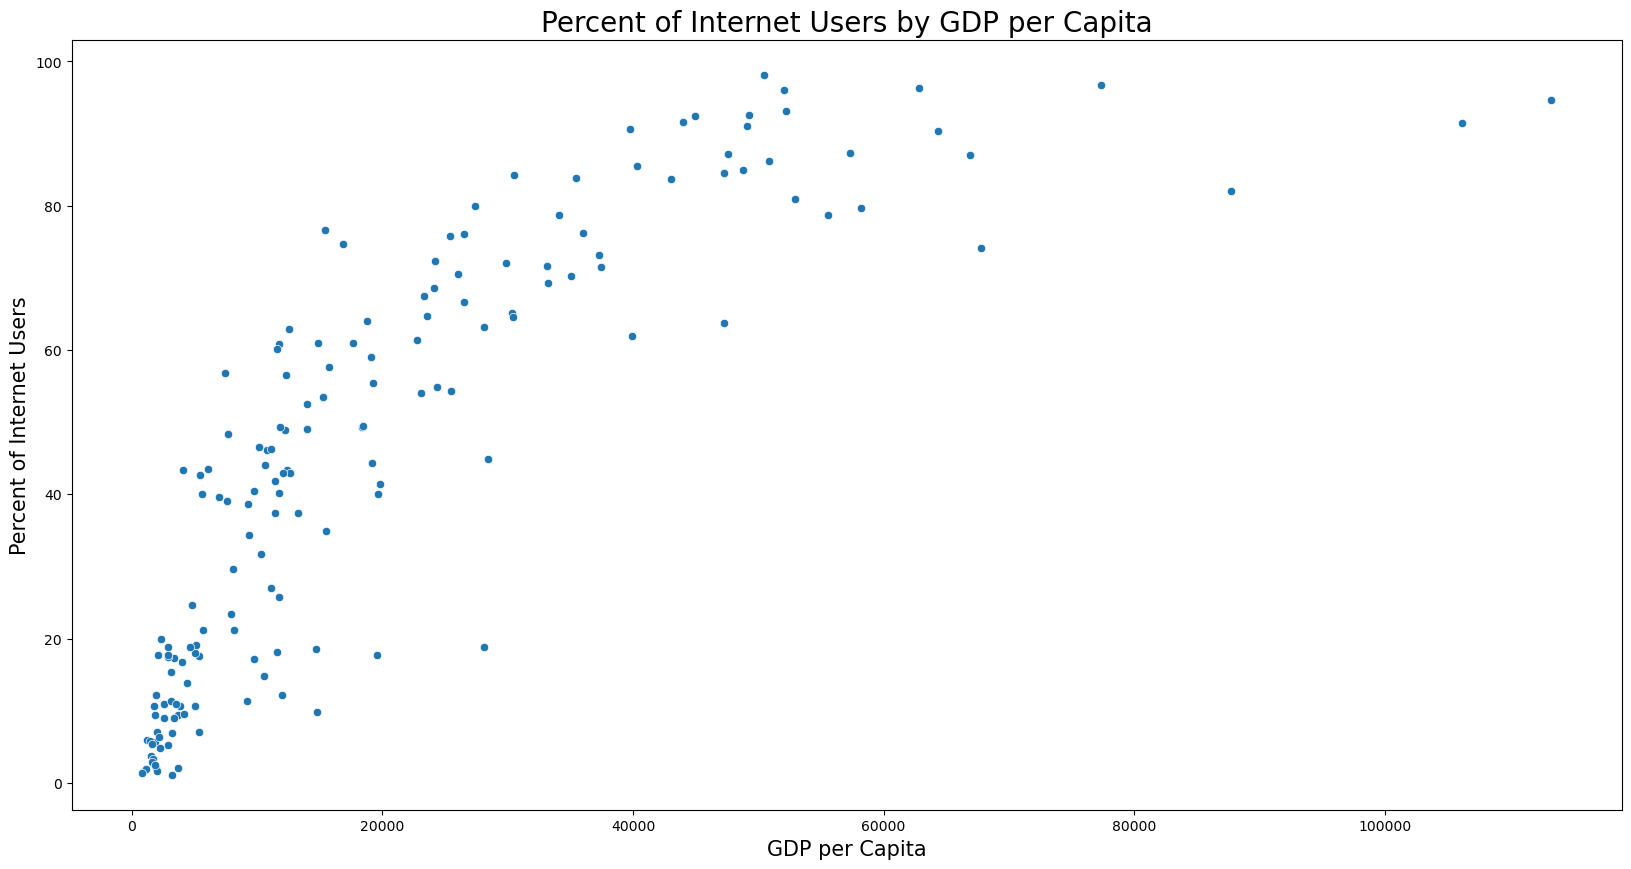

In [112]:
plt.figure(figsize = (20,10))

sns.scatterplot(data = gdp_and_internet_use_2014,
               x = 'gdp_per_capita',
               y = 'internet_users_pct')
plt.xlabel("GDP per Capita", fontsize=15)
plt.ylabel("Percent of Internet Users",fontsize=15)
plt.title("Percent of Internet Users by GDP per Capita", fontsize=20)
plt.show();

from comparing internet usage vs gdp_per_capita for the year 2014, interesting points to investigate would be outliers at 30,000, and outliers past 80,000

In [67]:
gdp_and_internet_use_2014["gdp_per_capita"].describe()


count       242.000000
mean      19604.864244
std       21048.833638
min         765.259554
25%        4652.197561
50%       12164.228037
75%       26485.329288
max      151616.402364
Name: gdp_per_capita, dtype: float64

In [68]:
gdp_and_internet_use_2014["internet_users_pct"].describe()

count    202.000000
mean      45.249851
std       29.573613
min        0.000000
25%       17.517500
50%       44.655000
75%       69.945000
max       98.160000
Name: internet_users_pct, dtype: float64

#### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
    

In [69]:
gdp_and_internet_use_2014["gdp_group"]=pd.qcut(gdp_and_internet_use_2014['gdp_per_capita'],3,['Low','Medium','High'])
gdp_and_internet_use_2014.sort_values("gdp_group")


/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_33354/1001280019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["gdp_group"]=pd.qcut(gdp_and_internet_use_2014['gdp_per_capita'],3,['Low','Medium','High'])


,country,year,gdp_per_capita,internet_users_pct,gdp_group
7637,Zimbabwe,2014,2316.954536,19.89,Low
3656,Kyrgyz Republic,2014,4722.086002,NaN,Low
3689,Lao PDR,2014,6145.497219,NaN,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
3947,Lesotho,2014,2574.296385,11.00,Low
...,...,...,...,...,...
8732,Central African Rep.,2014,NaN,4.03,NaN
8719,Cape Verde,2014,NaN,40.26,NaN
8708,Brunei Darussalam,2014,NaN,68.77,NaN
8703,Bahamas,2014,NaN,76.92,NaN


#### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [70]:
gdp_and_internet_use_2014_low=gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014["gdp_group"]=="Low"]
gdp_and_internet_use_2014_low["internet_users_pct"].median()

10.6

In [71]:
gdp_and_internet_use_2014_med=gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014["gdp_group"]=="Medium"]
gdp_and_internet_use_2014_med["internet_users_pct"].median()

43.4

In [72]:
gdp_and_internet_use_2014_high=gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014["gdp_group"]=="High"]
gdp_and_internet_use_2014_high["internet_users_pct"].median()

78.7

low gdp groups have low percentage of internet use, while high gdp groups have a high percentage of internet use.


### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [73]:
pd.read_csv('../data/hazardous_waste_produced.csv')

,Country or Area,Year,Value,Value Footnotes,Unit
0,Algeria,2007,325100.0,NaN,tonnes
1,Algeria,2003,325000.0,1,tonnes
2,Algeria,1997,185000.0,1,tonnes
3,Algeria,1995,185000.0,NaN,tonnes
4,Andorra,2021,1195.4,NaN,tonnes
...,...,...,...,...,...
1009,11,This quantity represents biomedical waste only.,NaN,NaN,NaN
1010,12,Only health establishment waste information is...,NaN,NaN,NaN
1011,13,Figures are for quantities of hazardous wastes...,NaN,NaN,NaN
1012,14,Units are in cubic metres.,NaN,NaN,NaN
